In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
pd.set_option('display.max_columns', None)

In [2]:
# Turn off while experimenting
warnings.filterwarnings('ignore')

In [3]:
# Ensure reproducibility
REP = 1
np.random.seed(REP)

## Group 7
### 012205927 - Ana Terović
### 012206591 - Fani Sentinella-Jerbić
### 012228451 - Jasper De Landsheere

In [4]:
def evaluate(clfs, X, y, plot=True):
    results = []
    
    for clf in clfs:
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
        # Fit the model
        clf.fit(X_train, y_train)
    
        # Make predictions
        y_pred = clf.predict(X_test)
    
        # Get name of the classifier
        name = type(clf).__name__
        
        # Calculate different scores
        res = {
            'Algorithm': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'F1 macro': f1_score(y_test, y_pred, average='macro'),
            'F1 micro': f1_score(y_test, y_pred, average='micro')
        }
        
        if plot:
            ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,  cmap='rocket_r')
        
        results.append(res)
        
    return pd.DataFrame(results)

In [5]:
df = pd.read_csv("diterpene_shuf.csv")

# Consider only multiplicity counts
df_simple = df[['a0', 'a1', 'a2', 'a3', 'a45c']]
df_simple.head()

,a0,a1,a2,a3,a45c
0,2,4,8,6,52c
1,2,4,8,6,54c
2,2,4,8,6,54c
3,3,4,9,4,3c
4,3,4,9,4,3c


In [6]:
# Rename columns for better readability
df_simple = df_simple.rename(columns={'a0':'s_cnt', 'a1':'d_cnt', 'a2':'t_cnt', 'a3':'q_cnt', 'a45c':'Class'})

In [7]:
X = df_simple[['s_cnt', 'd_cnt', 't_cnt', 'q_cnt']]
y = df_simple['Class']

In [8]:
# Get the rest of features
df_rest = df.drop(columns=['a0', 'a1', 'a2', 'a3','a4', 'a45c'])
df_rest.head()

,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42,a43,a44
0,t,139.2,q,33.2,d,30.7,d,49.6,t,38.6,t,39.6,q,19.9,t,26.0,q,21.3,q,61.0,d,51.3,s,32.8,t,39.6,s,37.0,q,173.5,d,134.5,t,24.2,q,14.4,t,42.2,t,18.6
1,d,144.0,q,66.7,d,46.2,t,32.7,q,19.1,t,17.7,d,40.7,t,120.5,q,59.2,t,36.6,t,36.0,q,17.9,d,140.2,t,122.7,s,38.0,t,22.4,s,37.7,q,19.7,q,16.5,t,26.6
2,d,30.7,t,26.8,t,41.2,t,139.3,q,19.8,q,170.1,q,173.3,d,36.0,t,31.6,s,38.4,d,46.2,q,15.6,t,29.2,t,26.8,q,18.6,t,16.7,t,35.4,q,65.8,s,42.4,d,139.8
3,t,37.2,t,17.4,q,16.7,s,58.1,t,41.6,d,78.8,t,25.5,t,212.4,q,68.9,t,40.1,t,18.1,t,45.1,q,32.7,d,53.7,s,40.1,s,33.5,d,44.9,d,56.6,q,20.8,t,36.5
4,q,12.2,d,154.6,t,18.7,t,37.1,t,79.1,t,43.3,t,74.7,d,39.8,t,22.8,q,109.7,t,24.0,s,40.0,d,79.2,q,17.0,q,64.5,d,49.5,t,38.8,t,71.4,s,36.8,s,46.2


In [9]:
t_sum = []
q_sum = []
s_sum = []
d_sum = []
t_mean = []
q_mean = []
s_mean = []
d_mean = []
t_std = []
q_std = []
s_std = []
d_std = []
t_min = []
q_min = []
s_min = []
d_min = []
t_max = []
q_max = []
s_max = []
d_max = []
cols = df_rest.columns.values

# Consider each structure individually
for index, row in df_rest.iterrows():
    tvals = []
    qvals = []
    svals = []
    dvals = []
    # Gather up frequencies for each multiplicity
    for i in range(1, len(cols), 2):
        mul = row[cols[i-1]]
        freq = row[cols[i]]
        if mul == 't':
            tvals.append(freq)
        elif mul == 'q':
            qvals.append(freq)
        elif mul == 's':
            svals.append(freq)
        elif mul == 'd':
            dvals.append(freq)
            
    t_sum.append(sum(tvals))
    q_sum.append(sum(qvals))
    s_sum.append(sum(svals))
    d_sum.append(sum(dvals))
    
    t_mean.append(np.mean(tvals))
    q_mean.append(np.mean(qvals))
    s_mean.append(np.mean(svals))
    d_mean.append(np.mean(dvals))
    
    t_std.append(np.std(tvals))
    q_std.append(np.std(qvals))
    s_std.append(np.std(svals))
    d_std.append(np.std(dvals))
    
    t_min.append(np.min(tvals))
    q_min.append(np.min(qvals))
    s_min.append(np.min(svals))
    d_min.append(np.min(dvals))
    
    t_max.append(np.max(tvals))
    q_max.append(np.max(qvals))
    s_max.append(np.max(svals))
    d_max.append(np.max(dvals))

In [10]:
X['t_freq_sum'] = t_sum
X['q_freq_sum'] = q_sum
X['s_freq_sum'] = s_sum
X['d_freq_sum'] = d_sum
X['t_freq_mean'] = t_mean
X['q_freq_mean'] = q_mean
X['s_freq_mean'] = s_mean
X['d_freq_mean'] = d_mean
X['t_freq_std'] = t_std
X['q_freq_std'] = q_std
X['s_freq_std'] = s_std
X['d_freq_std'] = d_std
X['t_freq_min'] = t_min
X['q_freq_min'] = q_min
X['s_freq_min'] = s_min
X['d_freq_min'] = d_min
X['t_freq_max'] = t_max
X['q_freq_max'] = q_max
X['s_freq_max'] = s_max
X['d_freq_max'] = d_max

In [11]:
X

,s_cnt,d_cnt,t_cnt,q_cnt,t_freq_sum,q_freq_sum,s_freq_sum,d_freq_sum,t_freq_mean,q_freq_mean,s_freq_mean,d_freq_mean,t_freq_std,q_freq_std,s_freq_std,d_freq_std,t_freq_min,q_freq_min,s_freq_min,d_freq_min,t_freq_max,q_freq_max,s_freq_max,d_freq_max
0,2,4,8,6,368.0,323.3,69.8,266.1,46.000000,53.883333,34.900,66.525000,36.165177,55.620842,2.100000,40.069588,18.6,14.4,32.8,30.7,139.2,173.5,37.0,134.5
1,2,4,8,6,415.2,199.1,75.7,371.1,51.900000,33.183333,37.850,92.775000,40.703378,21.182887,0.150000,49.381594,17.7,16.5,37.7,40.7,122.7,66.7,38.0,144.0
2,2,4,8,6,347.0,463.2,80.8,252.7,43.375000,77.200000,40.400,63.175000,36.862133,68.943044,2.000000,44.588809,16.7,15.6,38.4,30.7,139.3,173.3,42.4,139.8
3,3,4,9,4,473.9,139.1,131.7,234.0,52.655556,34.775000,43.900,58.500000,57.280579,20.559836,10.396153,12.486993,17.4,16.7,33.5,44.9,212.4,68.9,58.1,78.8
4,3,4,9,4,409.9,203.4,123.0,323.1,45.544444,50.850000,41.000,80.775000,22.282186,39.652522,3.902136,45.026902,18.7,12.2,36.8,39.8,79.1,109.7,46.2,154.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,2,3,8,7,609.8,321.9,78.8,225.1,76.225000,45.985714,39.400,75.033333,60.015076,53.764657,0.600000,48.296400,27.0,15.7,38.8,36.1,200.1,172.1,40.0,143.1
1198,2,4,8,6,485.3,254.8,88.0,370.3,60.662500,42.466667,44.000,92.575000,41.474358,22.851671,4.300000,50.837111,19.1,16.4,39.7,36.2,127.8,74.2,48.3,143.9
1199,2,4,8,6,401.5,407.4,75.3,416.5,50.187500,67.900000,37.650,104.125000,29.571415,53.503987,3.050000,48.252947,22.6,15.3,34.6,55.6,117.3,166.1,40.7,157.2
1200,2,4,8,6,335.3,153.5,76.4,257.5,41.912500,25.583333,38.200,64.375000,30.313258,16.691656,0.100000,46.549241,17.3,15.7,38.1,30.6,120.4,62.8,38.3,144.4


In [12]:
clfs_to_try = [LogisticRegression(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier()]
evaluate(clfs_to_try, X, y, plot=False)

,Algorithm,Accuracy,F1 macro,F1 micro
0,LogisticRegression,0.834025,0.465376,0.834025
1,KNeighborsClassifier,0.788382,0.585168,0.788382
2,DecisionTreeClassifier,0.887967,0.519531,0.887967


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

,Algorithm,Accuracy,F1 macro,F1 micro
0,DecisionTreeClassifier,0.883817,0.559123,0.883817


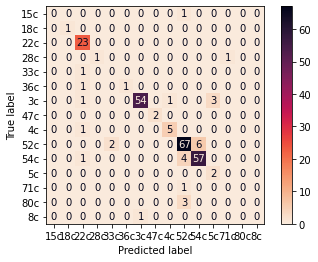

In [14]:
# Do a grid search
clf = DecisionTreeClassifier(random_state=REP)
grid_values = {'ccp_alpha': [0.1, 0.01, 0.001, 0.0001, 0],
               'criterion': ['gini', 'entropy'],
               'max_depth': [5, 6, 7, 8, 9, 10, None],
               'max_features': ['auto', 'sqrt', 'log2']
              }
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy', n_jobs=-1)
grid_clf_acc.fit(X_train, y_train)
evaluate([DecisionTreeClassifier(**grid_clf_acc.best_params_)], X, y)

,Algorithm,Accuracy,F1 macro,F1 micro
0,KNeighborsClassifier,0.896266,0.603864,0.896266


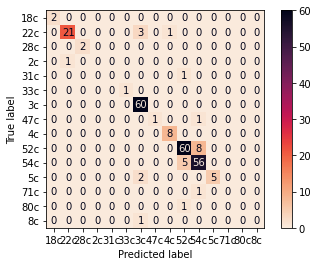

In [15]:
# Do a grid search
clf = KNeighborsClassifier()
grid_values = {'n_neighbors':[6,8,10,12,14,16,18,20],
               'leaf_size':list(range(1,50,5)),
               "metric":["euclidean", "manhattan", "chebyshev"],
               'weights':['uniform', 'distance'],
               'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
              }
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy', n_jobs=-1)
grid_clf_acc.fit(X_train, y_train)
evaluate([KNeighborsClassifier(**grid_clf_acc.best_params_)], X, y)

,Algorithm,Accuracy,F1 macro,F1 micro
0,LogisticRegression,0.929461,0.698864,0.929461


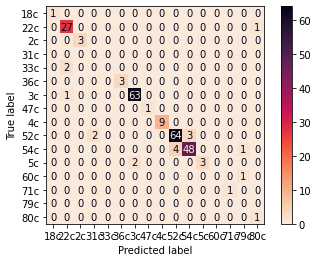

In [16]:
# Do a grid search
clf = LogisticRegression(random_state=REP)
grid_values = {'penalty': ['l2'], 
               'C':[0.001,.009,0.01,.09,1,5,10,25], 
               'solver':['lbfgs'], 
               'max_iter':[100,1000,2500]
              }
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy', n_jobs=-1)
grid_clf_acc.fit(X_train, y_train)
evaluate([LogisticRegression(**grid_clf_acc.best_params_)], X, y)

In [17]:
score = cross_val_score(LogisticRegression(**grid_clf_acc.best_params_), X=X, y=y)
print("{:.4} +/- {:.4}".format(np.mean(score), np.std(score)))

0.906 +/- 0.01089
